# Executive Summary

The West Nile Virus (WNV), which first originated in the West Nile area (Uganda) of Africa in 1937, recently made its way to the United States. The major vector for WNV are the mosquito species *Culex Pipiens* and *Culex Restuans*. The pathogen is further amplified by birds when they get bitten by an infected mosquito. A large majority (about 80%) of people infected with WNV are asymptomatic. In general, the illness is not life threatening with those who exhibit symptoms experiencing fevers and aches and then fatigue which may last for several weeks. However those aged 60 and above are at an increased risk of developing complications in the central nervous system, which can lead to permanent damage or even death.

The windy city, Chicago, is ranked as one of the worst cities in USA for mosquito infestation. As such, the risk of transmission and propagation of WNV is a matter of serious concern. Each year, Chicago's Department of Public Health deploys workers to set up mosquito traps throughout the city to collect mosquitos to test for the presence of WNV. 

A new data science team was formed within the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE) to utilize the collected data, along with data from the 2 weather stations in Chicago, to predict when WNV outbreaks are likely to occur each year. A predictive model was developed using Adaptive Boost Classifier and optimized for sensitivity.

The project is divided into two separate notebooks:
- Data Cleaning and EDA
- Modelling and Evaluation

This notebook is for **Data Cleaning and EDA** after which a dataframe containing the selected model features will be outputted and fed into the next notebook.

# Contents
- [Problem Statement](#problem)
- [Train Data](#train)
    * [Visualizing Observation Dates](#dates)
    * [Visualizing Mosquito Outbreaks](#outbreaks)
        * [West Nile Virus Clusters](#clusters)
        * [Encoding Mosquito Species](#species)
- [Weather Data](#weather)
    * [Mismatching Datatypes](#mismatch)
    * [Merging Station Data](#merge)
- [Spray Data](#spray)
    * [Visualizing Spray Locations](#sprayloc)
- [Dataframe for Modeling](#model)
    * [Visualizing Correlation between Features](#corr)
    * [Feature Engineering](#engineer)
        * [Daylight Hours](#daylight)
        * [Rolling and Lagging](#rolllag)
- [Test Data](#test)

<a id='problem'></a>
# Problem Statement

With the recent rise in cases of WNV in Chicago, DATA-SCIENCE has initiated a project to construct a machine learning model to predict the occurence of WNV in the City. Current pesticide application practices do not appear to be effective in curbing the spread of the virus. This project aims to use the findings from machine learning to devise a more effective strategy to annual pesticide application in Chicago.

### Objectives

- Accurately predict the occurance of WNV
- Optimize model for sensitivity
- Recommend spraying strategy

### Stakeholders

- Disease and Treatment Agency, division of Societal Cures in Epidemiology and New Creative Engineering (DATA-SCIENCE)
- Department of Public Health Chicago
- Chicago Citizens

### Import Libraries

In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt 
import seaborn as sns
import regex as re
import numpy as np
import datetime  as dt

In [2]:
# import all necessary dataset 
train = pd.read_csv('../../datasets/train.csv')
test = pd.read_csv('../../datasets/test.csv')
spray = pd.read_csv('../../datasets/spray.csv')
weather = pd.read_csv('../../datasets/weather.csv')

In [3]:
# set display length for easy viewing
pd.options.display.max_rows=999
pd.options.display.max_columns=999

# Data Cleaning and EDA

### Change Header to Lowercase

In [4]:
# change columns for all dataframes to lowercase for easy reference
for df in [train, test, spray, weather]:
    df.columns = df.columns.str.lower()

<a id='train'></a>
## Train Dataset

In [5]:
#Preview the train data
train.head(3)

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [6]:
#Check datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    10506 non-null  object 
 1   address                 10506 non-null  object 
 2   species                 10506 non-null  object 
 3   block                   10506 non-null  int64  
 4   street                  10506 non-null  object 
 5   trap                    10506 non-null  object 
 6   addressnumberandstreet  10506 non-null  object 
 7   latitude                10506 non-null  float64
 8   longitude               10506 non-null  float64
 9   addressaccuracy         10506 non-null  int64  
 10  nummosquitos            10506 non-null  int64  
 11  wnvpresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [7]:
#Check values in train data
train.describe()

,block,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [8]:
#Check null values
train.isnull().sum()

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

In [9]:
#Check distribution of target variable
train['wnvpresent'].value_counts(normalize = True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

Our dataset is highly skewed. Only **5.2% of the observations contain the west nile virus.**

In [10]:
#Drop address, street, addressnumberandstreet, addressaccuracy columns as they are unnecessary
train.drop(columns = ['address','block','street','addressnumberandstreet','addressaccuracy'], inplace = True)

<a id='dates'></a>
### Visualizing observation dates

In [11]:
#Convert train date to datetime format and set as index.
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
train = train.set_index('date', drop = False)
test = test.set_index('date',drop = False)

#### Distribution of observations by year

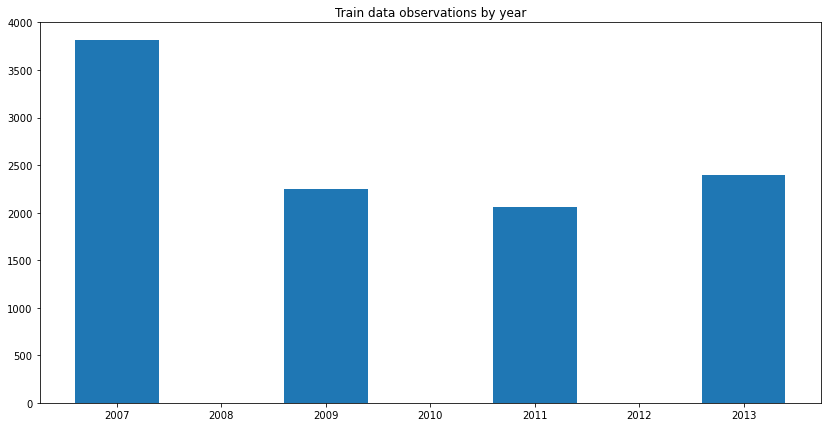

In [12]:
##### Plot train date by year
plt.figure(figsize = (14,7))
plt.bar(train['date'].dt.year.unique(),train['date'].dt.year.value_counts().sort_index())
plt.title('Train data observations by year');

The train dataset provided covers alternate years 2007, 2009, 2011 and 2013. The even years will be covered by the test data set (2008, 2010, 2012, 2014). Another observation to note is that there is proportionately more observations in 2007 vs the other years.

#### Distribution of observations by month

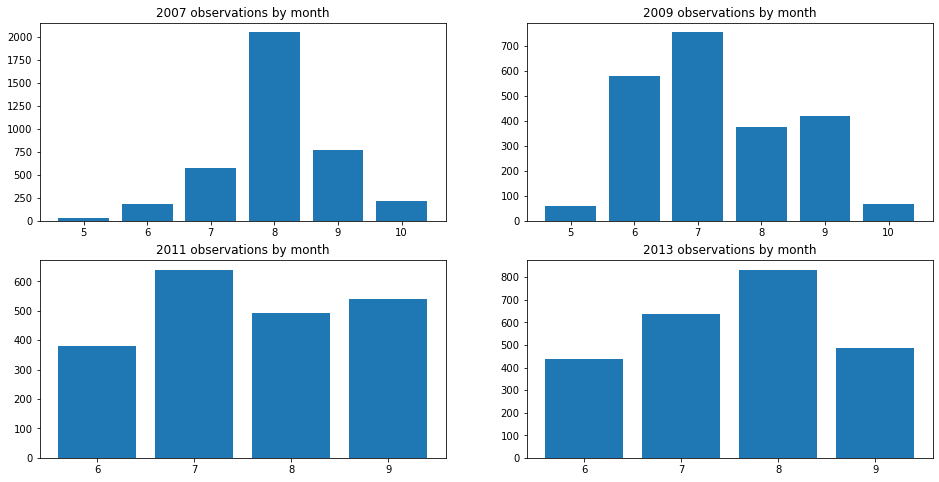

In [13]:
# Plot train date by month
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,8));

ax = ax.ravel()

# 2007
ax[0].bar(
    train[train['date'].dt.year == 2007]['date'].dt.month.unique(),
    train[train['date'].dt.year == 2007]['date'].dt.month.value_counts().sort_index(),
)

ax[0].set_title('2007 observations by month')

# 2009
ax[1].bar(
    train[train['date'].dt.year == 2009]['date'].dt.month.unique(),
    train[train['date'].dt.year == 2009]['date'].dt.month.value_counts().sort_index(),
)

ax[1].set_title('2009 observations by month')

# 2011
ax[2].bar(
    train[train['date'].dt.year == 2011]['date'].dt.month.unique(),
    train[train['date'].dt.year == 2011]['date'].dt.month.value_counts().sort_index(),
)
ax[2].set_xticks([6,7,8,9])
ax[2].set_title('2011 observations by month')


# 2013
ax[3].bar(
    train[train['date'].dt.year == 2013]['date'].dt.month.unique(),
    train[train['date'].dt.year == 2013]['date'].dt.month.value_counts().sort_index(),
)

ax[3].set_xticks([6,7,8,9])
ax[3].set_title('2013 observations by month');


We note that only the months from May to October are observed in the dataset. This is likely because the dataset only capture the summer months in Chicago. It is known that mosquitos go into [hibernation](https://www.cmmcp.org/mosquito-information/faq/where-do-mosquitoes-go-winter#:~:text=In%20temperate%20climates%2C%20adult%20mosquitoes,of%20females%20in%20late%20summer.) during the colder seasons, so it makes sense that the data collected is only during the warmer seasons.

The frequency of observations can vary from month to month, for example in 2007, the observations started in May and ramped up towards August, then decreasing towards October. As a result of this non-uniform collection of data, we will refrain from analysing the nominal mosquito/ west nile virus occurance across time for our analysis.

<a id='outbreaks'></a>
### Visualising Disease Outbreaks

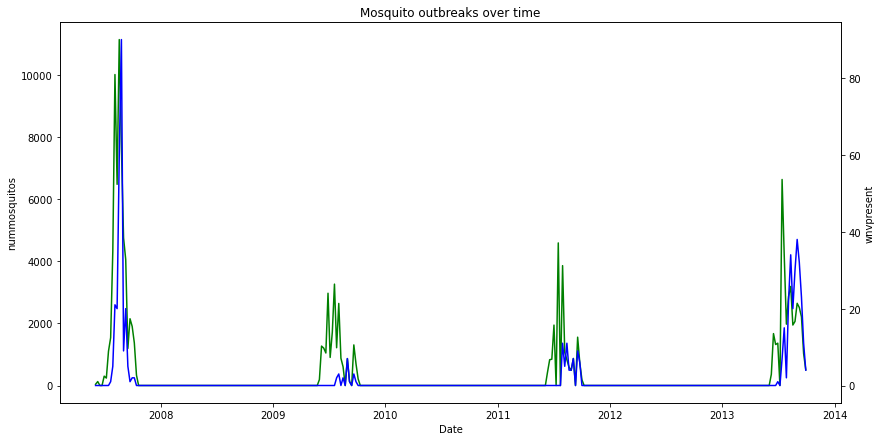

In [14]:
fig, ax1 = plt.subplots(figsize = (14,7));
ax2 = ax1.twinx();
ax1.plot(train.resample('w').sum()['nummosquitos'], 'g-');
ax2.plot(train.resample('w').sum()['wnvpresent'], 'b-');
ax1.set_title('Mosquito outbreaks over time')
ax1.set_xlabel('Date');
ax1.set_ylabel('nummosquitos');
ax2.set_ylabel('wnvpresent');

We can see that by week, the spikes in west nile virus detection coincides with the number of mosquitos. The outbreaks appear to peak in the middle of dates collected for the year (around July or August). In the training data, 2007 and 2013 have a greater occurance of west nile virus detected. There also seems to be a slight lag between the spikes in `nummosquitos` and `wnvpresent`. We can visualize this more clearly by plotting the above graph by year.

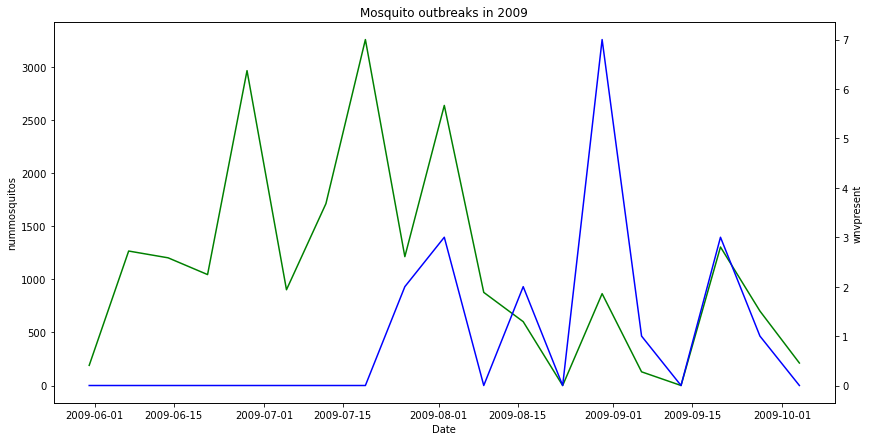

In [15]:
fig, ax1 = plt.subplots(figsize = (14,7));
ax2 = ax1.twinx();
ax1.plot(train.loc['2009'].resample('w').sum()['nummosquitos'], 'g-');
ax2.plot(train.loc['2009'].resample('w').sum()['wnvpresent'], 'b-');
ax1.set_title('Mosquito outbreaks in 2009')
ax1.set_xlabel('Date');
ax1.set_ylabel('nummosquitos');
ax2.set_ylabel('wnvpresent');

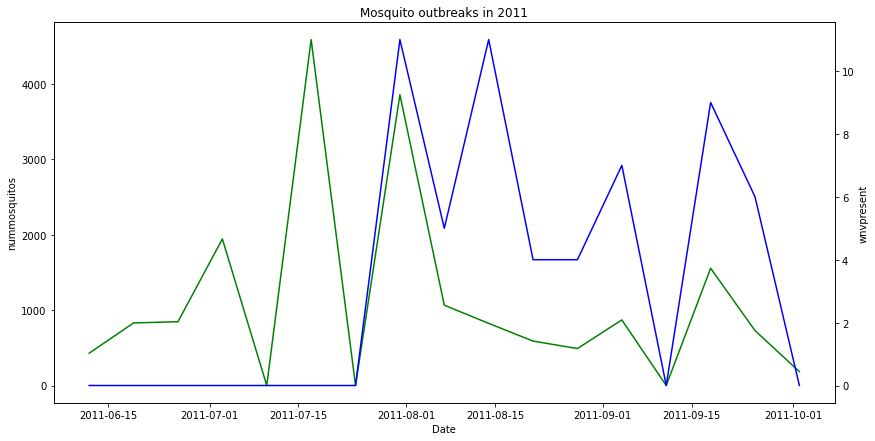

In [16]:
fig, ax1 = plt.subplots(figsize = (14,7));
ax2 = ax1.twinx();
ax1.plot(train.loc['2011'].resample('w').sum()['nummosquitos'], 'g-');
ax2.plot(train.loc['2011'].resample('w').sum()['wnvpresent'], 'b-');
ax1.set_title('Mosquito outbreaks in 2011')
ax1.set_xlabel('Date');
ax1.set_ylabel('nummosquitos');
ax2.set_ylabel('wnvpresent');

<a id='clusters'></a>
#### West Nile Virus Clusters
There are mosquito traps scattered around the city of Chicago to capture mosquitos. Each unique trap is tagged to a specific location using `latitude` and `longitude`. We can visualize this on a map and identify mosquito clusters using `wnvpresent` and `nummosquitos`.

In [17]:
#Select traps which captured mosuqitos carrying the west nile virus
traps_of_interest = train[train['wnvpresent'] == 1]

In [18]:
#Get columns for visualization
outbreaks = traps_of_interest[['trap','nummosquitos','wnvpresent']]
outbreaks.head()

,trap,nummosquitos,wnvpresent
date,,,
2007-07-18,T215,50,1
2007-07-25,T115,50,1
2007-07-25,T115,50,1
2007-07-25,T115,50,1
2007-07-25,T115,50,1


In [19]:
#Group outbreaks by year and by trap
outbreaks_07 = outbreaks.loc['2007'].groupby(by = 'trap').sum()[['nummosquitos','wnvpresent']]
outbreaks_09 = outbreaks.loc['2009'].groupby(by = 'trap').sum()[['nummosquitos','wnvpresent']]
outbreaks_11 = outbreaks.loc['2011'].groupby(by = 'trap').sum()[['nummosquitos','wnvpresent']]
outbreaks_13 = outbreaks.loc['2013'].groupby(by = 'trap').sum()[['nummosquitos','wnvpresent']]

In [20]:
outbreaks_07.head()

,nummosquitos,wnvpresent
trap,,
T002,191,8
T003,118,4
T005,17,2
T006,46,4
T008,138,5


In [21]:
trap_map = train.groupby(by = 'trap').mean()[['latitude','longitude']]

In [22]:
#Recombine information containing the trap locations
outbreaks_07 = outbreaks_07.join(trap_map)
outbreaks_09 = outbreaks_09.join(trap_map)
outbreaks_11 = outbreaks_11.join(trap_map)
outbreaks_13 = outbreaks_13.join(trap_map)

In [23]:
#load mapdata
mapdata = np.loadtxt("../../mapdata_copyright_openstreetmap_contributors.txt")

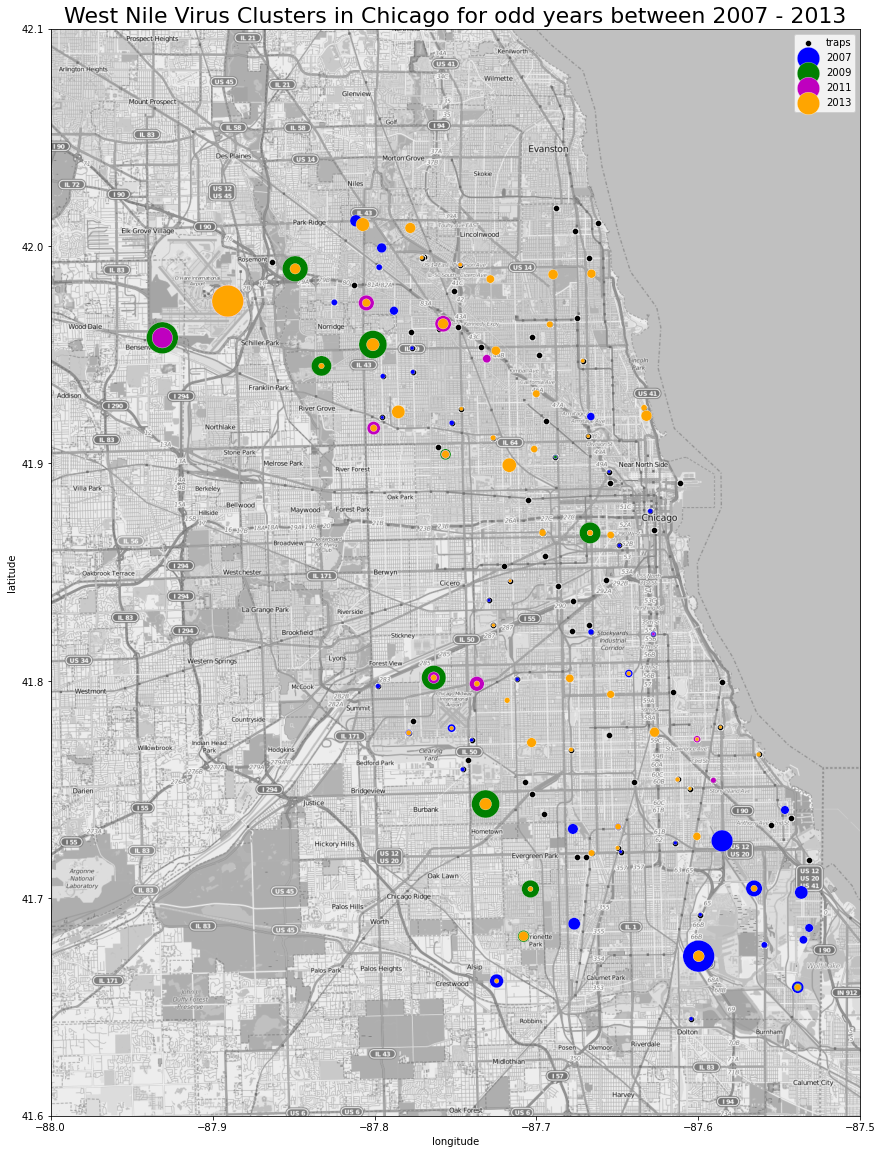

In [24]:
#Plot WNV clusters by year
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect);

sns.scatterplot(data = train, x = 'longitude', y = 'latitude', color = 'k');
sns.scatterplot(data = outbreaks_07, x = 'longitude', y = 'latitude', size = 'nummosquitos', sizes = (10,1000), color = 'b', legend = False);
sns.scatterplot(data = outbreaks_09, x = 'longitude', y = 'latitude', size = 'nummosquitos', sizes = (10,1000), color = 'g', legend = False);
sns.scatterplot(data = outbreaks_11, x = 'longitude', y = 'latitude', size = 'nummosquitos', sizes = (10,1000), color = 'm', legend = False);
sns.scatterplot(data = outbreaks_13, x = 'longitude', y = 'latitude', size = 'nummosquitos', sizes = (10,1000), color = 'orange', legend = False);

plt.title('West Nile Virus Clusters in Chicago for odd years between 2007 - 2013', fontsize = 22);
plt.legend(['traps','2007', '2009','2011','2013']);

<a id='species'></a>
#### Encoding mosquito species

In [25]:
#Check number of different species
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [26]:
#WNV is carried by specific species of mosquitos
train[['species','nummosquitos','wnvpresent']].groupby(by = 'species').sum()

,nummosquitos,wnvpresent
species,,
CULEX ERRATICUS,7,0
CULEX PIPIENS,44671,240
CULEX PIPIENS/RESTUANS,66268,262
CULEX RESTUANS,23431,49
CULEX SALINARIUS,145,0
CULEX TARSALIS,7,0
CULEX TERRITANS,510,0


There are a total of 7 different classes describing the mosquito species caught in traps in the training data. Of these classes, 3 are shown to be carriers of the west nile virus. We can encode the mosquito species into binary features. We can group the mosquito species into 3 general groups `culex_pipiens`, `culex_restuans` and `culex_pipiens/restuans`. The other species types will be dropped due to having low predictive.

In [27]:
train['species'].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [28]:
#Encode mosquito species into binary features
train['culex_pipiens'] = train['species'].map(lambda x: 1 if x == 'CULEX PIPIENS' else 0)
train['culex_pipiens/restuans'] = train['species'].map(lambda x: 1 if x == 'CULEX PIPIENS/RESTUANS' else 0)
train['culex_restuans'] = train['species'].map(lambda x: 1 if x == 'CULEX RESTUANS' else 0)

# drop column species
train.drop('species',axis=1, inplace=True)

<a id='weather'></a>
## Weather dataset
We will be using weather data to predict mosquito activity and link it to the prevalence of the west nile virus.

In [29]:
# Preview weather dataframe
weather.head(5)

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [30]:
#Check dataframe shape
weather.shape

(2944, 22)

There are 2944 observations and 22 features in the weather dataset.

<a id='mismatch'></a>
### Mismatching Data types

In [31]:
# weather data types per columns
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station      2944 non-null   int64  
 1   date         2944 non-null   object 
 2   tmax         2944 non-null   int64  
 3   tmin         2944 non-null   int64  
 4   tavg         2944 non-null   object 
 5   depart       2944 non-null   object 
 6   dewpoint     2944 non-null   int64  
 7   wetbulb      2944 non-null   object 
 8   heat         2944 non-null   object 
 9   cool         2944 non-null   object 
 10  sunrise      2944 non-null   object 
 11  sunset       2944 non-null   object 
 12  codesum      2944 non-null   object 
 13  depth        2944 non-null   object 
 14  water1       2944 non-null   object 
 15  snowfall     2944 non-null   object 
 16  preciptotal  2944 non-null   object 
 17  stnpressure  2944 non-null   object 
 18  sealevel     2944 non-null   object 
 19  result

There are several numerical features that are categorized as object. 


In [32]:
#Function for checking incorrect datatypes
def check_missing_weather(df):
    # check for non-numeric values
    check_cols = df[(weather=='M')|(weather=='  T')|(weather=='-')].dropna(how='all', axis=1)
    # return count of non-numeric values in each column
    for col_names in check_cols.columns:
        print(check_cols[col_names].value_counts())
        print(" ")

In [33]:
check_missing_weather(weather)

M    11
Name: tavg, dtype: int64
 
M    1472
Name: depart, dtype: int64
 
M    4
Name: wetbulb, dtype: int64
 
M    11
Name: heat, dtype: int64
 
M    11
Name: cool, dtype: int64
 
-    1472
Name: sunrise, dtype: int64
 
-    1472
Name: sunset, dtype: int64
 
M    1472
Name: depth, dtype: int64
 
M    2944
Name: water1, dtype: int64
 
M      1472
  T      12
Name: snowfall, dtype: int64
 
  T    318
M        2
Name: preciptotal, dtype: int64
 
M    4
Name: stnpressure, dtype: int64
 
M    9
Name: sealevel, dtype: int64
 
M    3
Name: avgspeed, dtype: int64
 


In [34]:
# check for non-numeric values in station 1
check_missing_weather(weather[weather['station']==1])

M    3
Name: wetbulb, dtype: int64
 
M    1472
Name: water1, dtype: int64
 
  T    12
Name: snowfall, dtype: int64
 
  T    163
Name: preciptotal, dtype: int64
 
M    2
Name: stnpressure, dtype: int64
 
M    5
Name: sealevel, dtype: int64
 


In [35]:
# check for non-numeric values in station 2
check_missing_weather(weather[weather['station']==2])

M    11
Name: tavg, dtype: int64
 
M    1472
Name: depart, dtype: int64
 
M    1
Name: wetbulb, dtype: int64
 
M    11
Name: heat, dtype: int64
 
M    11
Name: cool, dtype: int64
 
-    1472
Name: sunrise, dtype: int64
 
-    1472
Name: sunset, dtype: int64
 
M    1472
Name: depth, dtype: int64
 
M    1472
Name: water1, dtype: int64
 
M    1472
Name: snowfall, dtype: int64
 
  T    155
M        2
Name: preciptotal, dtype: int64
 
M    2
Name: stnpressure, dtype: int64
 
M    4
Name: sealevel, dtype: int64
 
M    3
Name: avgspeed, dtype: int64
 


After looking at columns with mismatching datatypes,  we notice that there are strings 'M', 'T', '-' in the values.

- 'M' indicates missing data, as such we will be replacing 'M' with nan, a special number used to represent a nonexistent result.
- 'T' indicates Trace amount
- '-' indicates values not available for sunrise/sunset. We will be replacing '-' with nan, a special number used to represent a nonexistent result

Most of the missing measurements come from station 2. For example, `depart`, `sunrise`. `sunset` and `depth` is missing for all dates for station 2. This is probably due to the station lacking the appropriate equipment to make these measurements. We will deal with this later by combining the data for both stations.

#### Tavg
This column represents the average temperature measured on a specific day. It is the average of `tmax` and `tmin` therefore missing data is impudated by calculating the mean from the other two columns. Furthermore, since the three columns are highly correlated, we will only use `tavg` and drop `tmax` and `tmin`

In [36]:
tavg = round((weather['tmax']+weather['tmin'])/2)
weather['tavg'] = tavg

In [37]:
weather.drop(columns = ['tmax','tmin'], inplace = True)

#### Water1
All observations for `water1` are missing, hence we can drop this column

In [38]:
weather['water1'].value_counts()

M    2944
Name: water1, dtype: int64

In [39]:
weather.drop(columns = 'water1', inplace = True)

#### Snowfall
Half of the values for `snowfall` are missing. A majority of the observations recorded 0 snowfall, with occasional trace or 0.1 inches of snowfall. This is due to the fact that the weather data are during the summer months when it is unlikely to snow. We can drop this column since it is not useful.

In [40]:
#  check columns with mismatched data type unique values
weather['snowfall'].value_counts(normalize = True)

M      0.500000
0.0    0.495584
  T    0.004076
0.1    0.000340
Name: snowfall, dtype: float64

In [41]:
weather.drop(columns = 'snowfall', inplace = True)

#### Preciptotal
This feature represents the amount of rainfall in inches. T represents trace amount. Since it is between 0 and 0.01 inches, we replace this value with 0.005

In [42]:
weather['preciptotal'].value_counts().head()

0.00    1577
  T      318
0.01     127
0.02      63
0.03      46
Name: preciptotal, dtype: int64

#### Depth
We realize that the `depth` column is not informative as it is either NaNs or 0s. It is reasonable to drop this column

In [43]:
weather['depth'].value_counts().head()

M    1472
0    1472
Name: depth, dtype: int64

In [44]:
weather.drop('depth', axis=1, inplace=True)

In [45]:
# replace 'T' in preciptotal to 0.005
weather['preciptotal'].replace('  T',0.005, inplace =True)

#### Wind Speed
`avgspeed` denotes the wind speed and `resultdir` is the direction of the wind in degrees. `resultspeed` is the vector sum of wind speeds and directions and therefore captures the two former columns. Hence we will drop `avgspeed` and `resultdir`

In [46]:
weather.drop(columns = ['avgspeed','resultdir'], inplace = True)

<a id='merge'></a>
## Merging Station data

The weather dataset provided daily weather data collected from 2 stations. We visually inspect the data from both stations.

In [47]:
weather['station'].value_counts(normalize = True)

2    0.5
1    0.5
Name: station, dtype: float64

In [48]:
#Check that both stations contain the same dates
for i, v in enumerate(weather[weather['station'] == 1]['date']):
    if v != weather[weather['station'] == 2]['date'].tolist()[i]:
        print(v)

In [49]:
#Check that numerical values for both stations are similar
weather.groupby('station').describe().T

station                      1            2
tavg        count  1472.000000  1472.000000
            mean     66.343071    67.618886
            std      10.502525    10.535854
            min      36.000000    36.000000
            25%      60.000000    60.000000
            50%      68.000000    70.000000
            75%      74.000000    76.000000
            max      92.000000    94.000000
dewpoint    count  1472.000000  1472.000000
            mean     53.377717    53.538043
            std      10.670263    10.683121
            min      22.000000    23.000000
            25%      46.000000    46.000000
            50%      54.000000    55.000000
            75%      61.250000    62.000000
            max      75.000000    74.000000
resultspeed count  1472.000000  1472.000000
            mean      6.987092     6.934239
            std       3.586353     3.589725
            min       0.100000     0.300000
            25%       4.400000     4.275000
            50%       6.400000     6.500000
            75%       9.100000     9.225000
            max      24.100000    21.700000

In [50]:
station_locations = pd.DataFrame({'station': [1,2],
                                 'latitude': [41.995,41.786],
                                 'longitude': [-87.933,-87.752]})

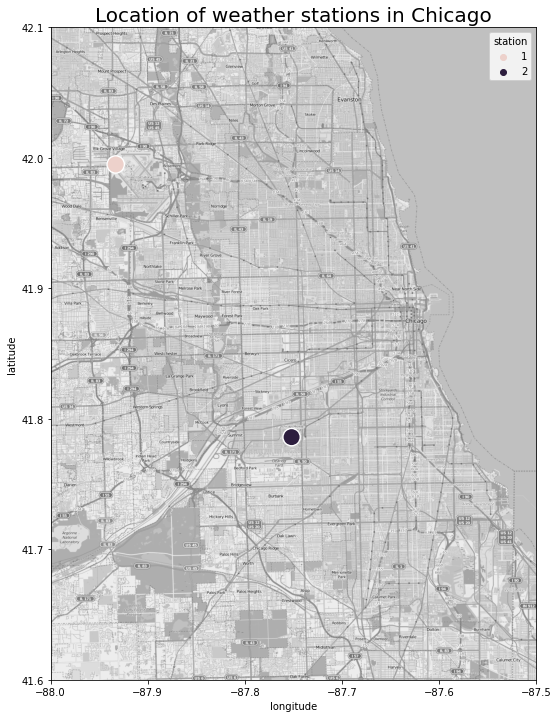

In [51]:
#Plot locations of both stations
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(12,12))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect);
sns.scatterplot(data = station_locations, x = 'longitude', y = 'latitude', hue = 'station', s = 300);
plt.title('Location of weather stations in Chicago', fontsize = 20);

The mean and standard deviation for the numerical features for each station do not differ significantly. The stations are also located such that they cover the north and south of Chicago. Therefore we can safely combine the two station's data to represent the weather for the entire city of Chicago.

#### Remaining missing measurements
All remaining null values will be impudated with np.nan so that we can merge them on date

In [52]:
# replace 'M' and '-' with numpy nan
weather.replace('M', np.nan, inplace=True)
weather.replace('-', np.nan, inplace=True)

In [53]:
# convert object to float
for v in ['depart', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'preciptotal', 'stnpressure', 'sealevel']:
    weather[v] = pd.to_numeric(weather[v])

In [54]:
#Check that numerical features are recognized as numeric datatypes
weather.dtypes

station          int64
date            object
tavg           float64
depart         float64
dewpoint         int64
wetbulb        float64
heat           float64
cool           float64
sunrise        float64
sunset         float64
codesum         object
preciptotal    float64
stnpressure    float64
sealevel       float64
resultspeed    float64
dtype: object

The weather data for the stations is aggregated in the following ways:

1) For numerical features, take the average of both stations

2) For numerical features with missing data, we impute missing data with the other station data on the same day.

3) For variables only captured in 1 station, we assume that the results will be the same for the other station.

4) For weather types, we assume that the weather type captured by either station will apply to the other station.

In [55]:
#remove station as it will no longer be necessary after combining
weather.drop('station', axis=1, inplace=True)

In [56]:
#Convert weather date to datetime format and set as index.
weather['date'] = pd.to_datetime(weather['date'], dayfirst=True)
weather = weather.set_index('date')

In [57]:
len(weather.index.date)

2944

In [58]:
weather.columns

Index(['tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'codesum', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed'],
      dtype='object')

### Merge station data by date

In [59]:
numeric_features = weather.resample('D', kind='period', convention='start').mean().dropna()

In [60]:
string_features = weather.resample('D', kind='period', convention='start').agg({'codesum': lambda x: ' '.join(x)}).dropna()

In [61]:
new_weather = pd.merge(numeric_features, string_features, on='date')

### Split CodeSum to Weather Types
This is a categorical feature representing different weather abnormalities during a particular day. We can create dummy features to represent each weather type.

In [62]:
# get unique values in codesum
weather_types = new_weather['codesum'].unique()

# show unique weather types
all_weather_types = []
for i in weather_types:
    weather_code = re.findall(r'\w{2}\+*', i)
    all_weather_types += weather_code
    
# get unique weather code 
unique_weather_types = set(all_weather_types)
unique_weather_types

{'BC',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MI',
 'RA',
 'SN',
 'SQ',
 'TS',
 'VC'}

split weather into 14 columns and return binary results

In [63]:
new_weather['codesum'].unique()

array(['   ', 'BR BR HZ', '  HZ', 'RA  ', 'BR HZ', 'BR HZ BR HZ',
       'RA BR TSRA RA BR', 'RA BR RA BR', 'RA VCTS TSRA RA',
       'RA HZ RA HZ', '  RA BR', 'TSRA RA BR HZ TSRA RA BR', 'HZ HZ',
       'RA HZ RA BR', 'TSRA BR HZ TSRA BR HZ',
       'TSRA RA BR HZ RA BR HZ VCTS', 'TSRA RA BR RA BR', 'RA RA',
       'RA HZ HZ', 'TSRA RA HZ TSRA RA HZ', 'RA RA BR',
       'TSRA BR HZ VCTS BR HZ', 'TSRA TSRA RA BR', 'TSRA RA BR TSRA RA',
       'TSRA BR HZ FU TSRA RA HZ FU', 'BR HZ FU BR', 'TSRA RA VCTS RA',
       'HZ VCTS TSRA HZ', '  VCTS', 'RA BR TSRA RA', 'RA BR VCTS RA BR',
       'TSRA RA BR VCTS TS TSRA RA BR HZ VCTS', 'DZ BR BR HZ',
       'TS TSRA RA BR HZ TS TSRA BR HZ', 'RA BR HZ RA BR HZ', 'HZ  ',
       'TSRA RA BR HZ TSRA RA BR VCTS', 'TSRA RA BR HZ TS TSRA BR HZ',
       'RA BR VCTS', 'TSRA RA BR TSRA RA DZ BR HZ', 'TSRA RA TSRA BR HZ',
       'BR  ', 'TSRA TSRA', 'TS TSRA RA BR TSRA RA BR',
       'TSRA RA BR TS TSRA RA BR', 'BR BR', 'TS RA BR TS RA BR',
       'TSRA RA 

In [64]:
# create columns for unique_weather_types
for v in unique_weather_types:
    new_weather[f'weathertype_{v}'] = [0 if re.search(v,codes) is None else 1 for codes in new_weather['codesum']]

In [65]:
new_weather.drop('codesum', axis=1, inplace=True)
new_weather.columns = new_weather.columns.str.lower()

In [66]:
new_weather.head(3)

,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,weathertype_vc,weathertype_dz,weathertype_ra,weathertype_hz,weathertype_sn,weathertype_br,weathertype_fg,weathertype_fu,weathertype_sq,weathertype_gr,weathertype_ts,weathertype_bc,weathertype_fg+,weathertype_mi
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,67.0,14.0,51.0,56.5,0.0,2.5,448.0,1849.0,0.0,29.140,29.820,2.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2007-05-02,51.0,-3.0,42.0,47.0,13.5,0.0,447.0,1850.0,0.0,29.410,30.085,13.15,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2007-05-03,57.0,2.0,40.0,49.0,8.0,0.0,446.0,1851.0,0.0,29.425,30.120,12.30,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [67]:
new_weather.shape

(1471, 26)

In [68]:
new_weather[new_weather['sunset'] == 1760]

,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,weathertype_vc,weathertype_dz,weathertype_ra,weathertype_hz,weathertype_sn,weathertype_br,weathertype_fg,weathertype_fu,weathertype_sq,weathertype_gr,weathertype_ts,weathertype_bc,weathertype_fg+,weathertype_mi
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-09-16,59.0,-6.0,39.0,49.5,5.5,0.0,532.0,1760.0,0.0000,29.490,30.195,7.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2008-09-16,60.0,-4.0,50.0,55.0,4.5,0.0,532.0,1760.0,0.0000,29.495,30.185,5.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2009-09-16,66.0,1.0,54.0,59.5,0.0,1.0,532.0,1760.0,0.0000,29.515,30.190,11.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2010-09-16,62.5,-3.0,55.5,59.0,2.5,0.0,532.0,1760.0,0.0950,29.215,29.875,7.00,0,0,1,1,0,1,0,0,0,0,0,0,0,0
2011-09-16,53.0,-12.0,39.0,47.0,12.0,0.0,532.0,1760.0,0.0000,29.620,30.330,2.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-09-16,65.0,-1.0,46.5,55.5,1.0,1.0,532.0,1760.0,0.0000,29.335,30.040,4.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2013-09-16,59.0,-6.0,47.0,52.5,6.0,0.0,532.0,1760.0,0.0025,29.620,30.295,10.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2014-09-16,57.0,-8.0,44.5,51.0,8.0,0.0,532.0,1760.0,0.0000,29.440,30.150,2.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id='spray'></a>
## Spray Data
The spray dataset represents the dates and location of pesticide application around the city of Chicago.

In [69]:
# check null values
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

The time columns in the spray dataset has a few null values we will replace them with blanks.

In [70]:
# fill all null values with blank
spray.fillna("", inplace=True)

In [71]:
# check shape
spray.shape

(14835, 4)

In [72]:
#Number of unique spray dates
spray['date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

There are 10 unique spray dates for the years 2011 and 2013.

<a id='sprayloc'></a>
#### Visualising Spray Locations

In [73]:
#Remove sprays that occur outside area of interest

spray = spray[spray.latitude < 42.1]
spray = spray[spray.longitude > -88]

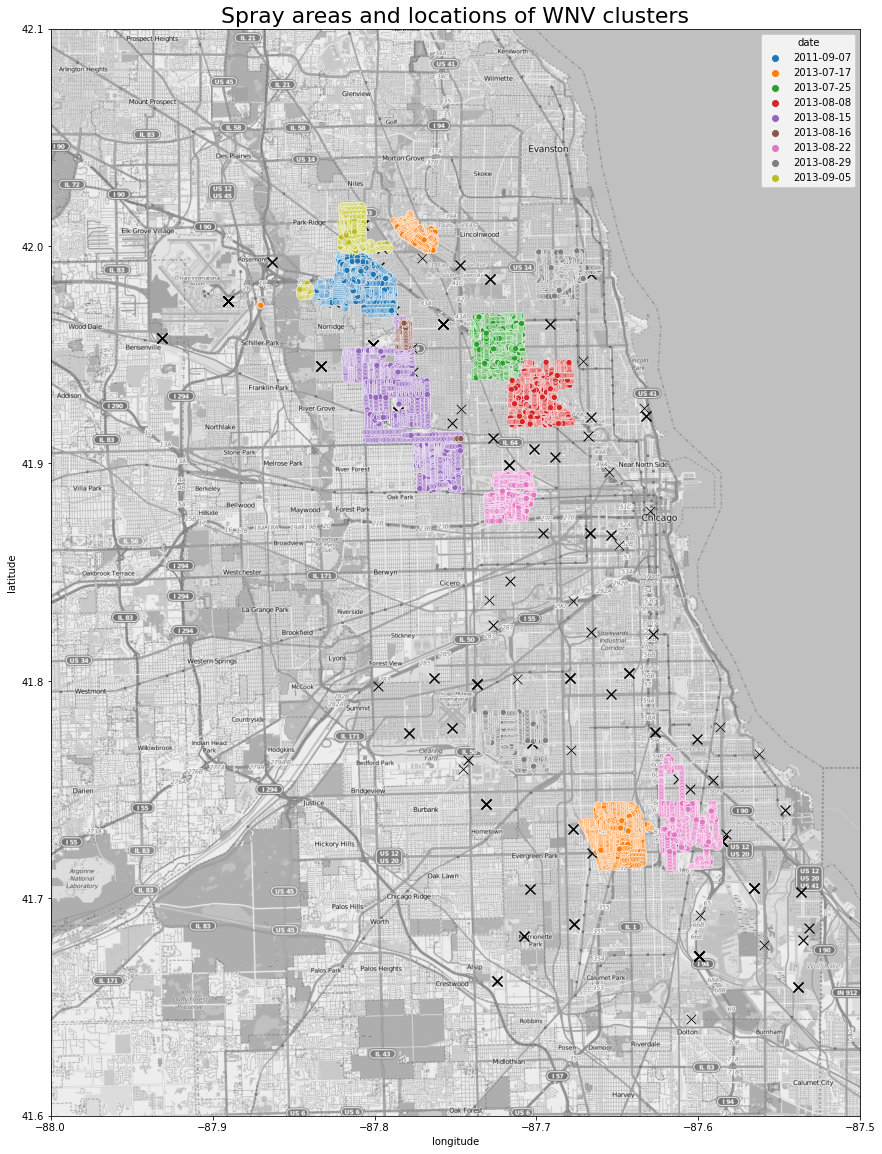

In [74]:
#Plot spray clusters by date
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect);
sns.scatterplot(data = train[train['wnvpresent']==1], x = 'longitude', y = 'latitude', marker = 'x', color = 'k', s = 90);
sns.scatterplot(data = spray, x = 'longitude', y = 'latitude', hue = 'date');

plt.title('Spray areas and locations of WNV clusters', fontsize = 22);

The spray data will not be used in our modeling process as the dates do not match with the dates in the train or test data. The spray dates are mostly in 2013 and do not paint a full picture on the effectiveness of the current spraying strategy. Furthermore our model predicts WNV prevalence using the weather for the whole city. Therefore localized spraying will be inconsequential for our prediction.

<a id='model'></a>
## Dataframe for Modeling
We combine the train and weather data to be used in modelling.

In [75]:
train.head(3)

,date,trap,latitude,longitude,nummosquitos,wnvpresent,culex_pipiens,culex_pipiens/restuans,culex_restuans
date,,,,,,,,,
2007-05-29,2007-05-29,T002,41.954690,-87.800991,1,0,0,1,0
2007-05-29,2007-05-29,T002,41.954690,-87.800991,1,0,0,0,1
2007-05-29,2007-05-29,T007,41.994991,-87.769279,1,0,0,0,1


In [76]:
new_weather.index = new_weather.index.to_timestamp()

In [77]:
type(new_weather.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [78]:
train.shape

(10506, 9)

In [79]:
new_weather.shape

(1471, 26)

In [80]:
df = pd.merge(train, new_weather, left_index=True, right_index=True)

In [81]:
df.shape

(10506, 35)

In [82]:
df.head()

,date,trap,latitude,longitude,nummosquitos,wnvpresent,culex_pipiens,culex_pipiens/restuans,culex_restuans,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,weathertype_vc,weathertype_dz,weathertype_ra,weathertype_hz,weathertype_sn,weathertype_br,weathertype_fg,weathertype_fu,weathertype_sq,weathertype_gr,weathertype_ts,weathertype_bc,weathertype_fg+,weathertype_mi
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-29,2007-05-29,T002,41.954690,-87.800991,1,0,0,1,0,75.0,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2007-05-29,2007-05-29,T002,41.954690,-87.800991,1,0,0,0,1,75.0,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2007-05-29,2007-05-29,T007,41.994991,-87.769279,1,0,0,0,1,75.0,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2007-05-29,2007-05-29,T015,41.974089,-87.824812,1,0,0,1,0,75.0,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2007-05-29,2007-05-29,T015,41.974089,-87.824812,4,0,0,0,1,75.0,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [83]:
#Drop these weather types as they are rare and did not occur during the dates in the training set
df.drop(columns = ['weathertype_fg+','weathertype_mi','weathertype_gr','weathertype_sn','weathertype_bc','weathertype_fu','weathertype_sq'], inplace = True)

<a id='corr'></a>
### Visualizing Correlations between Features

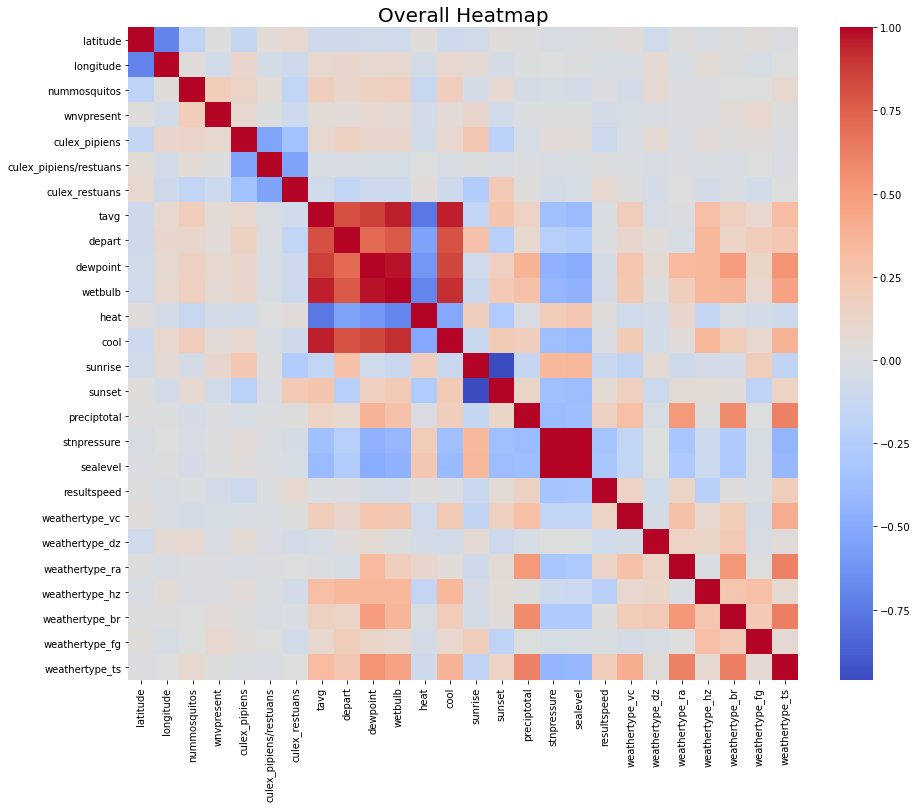

In [84]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(), cmap = 'coolwarm');
plt.title('Overall Heatmap', fontsize = 20);

In [85]:
data = df.drop(columns = ['latitude','longitude'])

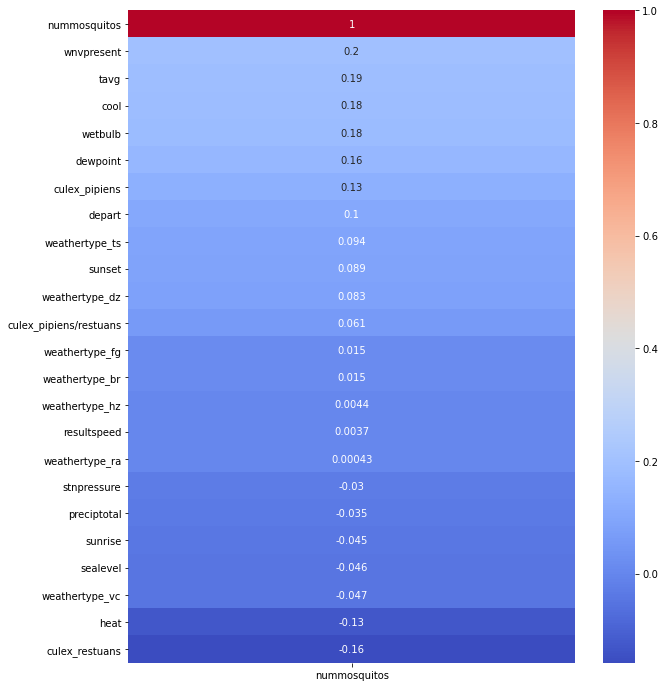

In [86]:
plt.figure(figsize = (10,12));
sns.heatmap(data.corr()[['nummosquitos']].sort_values('nummosquitos',ascending=False), cmap = 'coolwarm', annot = True);

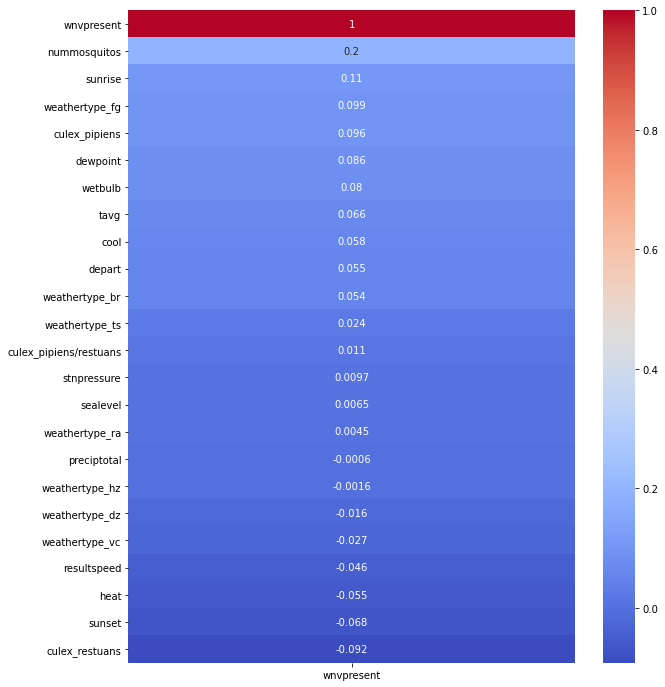

In [87]:
#zoom in on features correlation to target feature
plt.figure(figsize = (10,12));
sns.heatmap(data.corr()[['wnvpresent']].sort_values('wnvpresent',ascending=False), cmap = 'coolwarm', annot = True);

In [88]:
weather

,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed
date,,,,,,,,,,,,,
2007-05-01,66.0,14.0,51,56.0,0.0,2.0,448.0,1849.0,,0.000,29.10,29.82,1.7
2007-05-01,68.0,NaN,51,57.0,0.0,3.0,NaN,NaN,,0.000,29.18,29.82,2.7
2007-05-02,50.0,-3.0,42,47.0,14.0,0.0,447.0,1850.0,BR,0.000,29.38,30.09,13.0
2007-05-02,52.0,NaN,42,47.0,13.0,0.0,NaN,NaN,BR HZ,0.000,29.44,30.08,13.3
2007-05-03,56.0,2.0,40,48.0,9.0,0.0,446.0,1851.0,,0.000,29.39,30.12,11.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-29,44.0,NaN,34,42.0,20.0,0.0,NaN,NaN,,0.000,29.42,30.07,8.5
2014-10-30,42.0,-4.0,34,40.0,23.0,0.0,622.0,1649.0,,0.000,29.34,30.09,5.1
2014-10-30,45.0,NaN,35,42.0,20.0,0.0,NaN,NaN,RA,0.005,29.41,30.10,5.9


#### Reducing multicollinearity
Two features will be dropped - `heat` and `dewpoint`

`heat` represents the increase in temperature from the onset of the season begining in July. The feature shows strong collinearity to `cool`, which represents the decrease in temperature from the onset of the season starting in January. Since `cool` showed a slightly stronger correlation to the target feature, we keep `cool` and drop `heat`.

`dewpoint` and `wetbulb` are both features which are related to the humidity in the air. The dewpoint temperature is the temperature at which the air has to cool in order for condensation to occur. The wetbulb temperature is the temperature measured when covering the thermometer with a wet cloth (thus simulating an environment of 100% humidity). We will drop `wetbulb` as `dewpoint` shows a slighly stronger correlation to the target feature. Furthermore, we can estimate the relative humidity using `dewpoint` and `tavg`. This is done in the section below.

In [89]:
df.drop(columns = ['heat','wetbulb'], inplace = True)

<a id='engineer'></a>
## Feature Engineering
At first glance, all the weather features exhibit weak correlation to the target feature. We can include feature engineering to amplify the signal of our original features.

#### Accounting for time lags and mosquito breeding cycle

Logically, it does not make sense that only today's weather will have an impact on the number of mosquitos. According to research on [how weather conditions affect mosquito activity](https://www.preventivepestcontrol.com/weather-affect-mosquito-activity/), as well as the life cycle of the Culex Pipiens species ([Source 1](https://entnemdept.ufl.edu/creatures/aquatic/culex_pipiens.html), [Source 2](https://www.cdc.gov/mosquitoes/about/life-cycles/culex.html)):

1) Mosquitos are the most active during warm and humid climates (above 80 degrees farenheit)

2) A cool spell following very hot temperatures increases mosquito biting activity. However excessively hot temperatures reduces biting activity. Thus there is an ideal temperature range for mosquitos.

3) Mosquito activity tends to increase when there is an extended period of warm nights.

4) Rain will cause stagnant water pools to form, which helps mosquitos to lay eggs. The lifecycle can be summarized as follows: Eggs -> Larvae -> Pupae -> Adult. Adult mosquitos form after 7-10 days from egg laying.

5) Rain may disrupt the eggs laid which may inhibit later mosquito activity

There are many ways in which the weather affects the number of mosquitos in the environment. As an attempt to control these nuances, we use a combination of rolling averages and lag terms to capture the effects of the weather that increases mosquito activities. Rolling averages help to buffer for weather conditions, taking an aggregate of the past days into account. Lag features account for the mosquito's breeding cycle, as noted, mosquito require some days for the eggs to mature into an adult. So weather conditions in previous days will affect mosquito activity today.

<a id='daylight'></a>
### Daylight Hours
The key transmitters of West Nile virus (Culex mosquitoes do not bite during the day). With that in mind we will engineer a new feature to represent the hours of daylight each day from the sunset and sunrise columns.

[Source: West Nile Virus and Mosquito Management](https://extension.colostate.edu/topic-areas/insects/west-nile-virus-and-mosquito-management-frequently-asked-questions/) 

In [90]:
# convert sunrise sunset float number to data time 
def float_to_time(time):
    time = str(int(time)).zfill(4)
    time = time[:2] + ':' + time[2:]
    time = dt.datetime.strptime(time,'%H:%M').time()
    return time

In [91]:
#Change time of sunset 1760 to 1800
df['sunset'].replace(1760,1800, inplace=True)

In [92]:
new_sunset = []
for x in df['sunset']:
    new_sunset.append(dt.datetime.combine(dt.date(1, 1, 1),float_to_time(x)))
df['sunset'] = new_sunset

In [93]:
new_sunrise = []
for x in df['sunrise']:
    new_sunrise.append(dt.datetime.combine(dt.date(1, 1, 1),float_to_time(x)))
df['sunrise'] = new_sunrise

In [94]:
df['daylighthours'] = df['sunset'] - df['sunrise']

In [95]:
#Convert daylight hours to float
hours = []
for x in df['daylighthours']:
    hours.append(round(x.total_seconds()/3600,2))
df['daylighthours'] = hours

In [96]:
df['daylighthours'].head(5)

date
2007-05-29    14.93
2007-05-29    14.93
2007-05-29    14.93
2007-05-29    14.93
2007-05-29    14.93
Name: daylighthours, dtype: float64

In [97]:
# remove sunset sunrise columns
df.drop(['sunset','sunrise'], axis=1, inplace=True)

### Relative Humidity
Relative humidity can be estimated using `tavg` and `dewpoint` by first calculating the respective vapour pressures of water at typical atmospheric conditions then taking the ratio of the actual vapour pressure to the saturation vapour pressure. 

[Source: Vapour Pressure](https://www.weather.gov/media/epz/wxcalc/vaporPressure.pdf) 

[Source: Relative Humidity](http://ww2010.atmos.uiuc.edu/(Gh)/guides/mtr/cld/dvlp/rh.rxml)

In [98]:
# Convert temperature to units of Celcius
T = (df['tavg'] - 32) * (5/9)
TD = (df['dewpoint'] - 32) * (5/9)

#Calculate vapour pressures
vap_act = 6.11 * (10 ** ((7.5*TD)/(237.3 + TD)))
vap_sat =  6.11 * (10 ** ((7.5*T)/(237.3 + T)))

#Relative humidity
RH = 100* vap_act/vap_sat

In [99]:
df['relative_humidity'] = RH

<a id='rolllag'></a>
### Rolling and lagging features
We can take the rolling average and lag the dates for features that are associated with rain to account for the mosquito breeding cycle.

In [100]:
# Create function to generate new features that account for lag and rolling average
def create_roll_lag(dataframe, features, rolls, lags):
    for roll in rolls:
        for lag in lags:
            for feature in features:
                new_name = f'{feature}_roll{roll}_lag{lag}'
                dataframe[new_name] = dataframe[feature].rolling(window = roll).mean().shift(lag)
    return dataframe

In [101]:
create_roll_lag(df, features = ['preciptotal'], rolls = [1], lags = [10])
create_roll_lag(df, features = ['stnpressure','sealevel','resultspeed'], rolls = [7], lags = [28])

,date,trap,latitude,longitude,nummosquitos,wnvpresent,culex_pipiens,culex_pipiens/restuans,culex_restuans,tavg,depart,dewpoint,cool,preciptotal,stnpressure,sealevel,resultspeed,weathertype_vc,weathertype_dz,weathertype_ra,weathertype_hz,weathertype_br,weathertype_fg,weathertype_ts,daylighthours,relative_humidity,preciptotal_roll1_lag10,stnpressure_roll7_lag28,sealevel_roll7_lag28,resultspeed_roll7_lag28
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-29,2007-05-29,T002,41.954690,-87.800991,1,0,0,1,0,75.0,10.0,58.5,10.5,0.0,29.415,30.10,5.80,0,0,0,1,1,0,0,14.93,56.514105,NaN,NaN,NaN,NaN
2007-05-29,2007-05-29,T002,41.954690,-87.800991,1,0,0,0,1,75.0,10.0,58.5,10.5,0.0,29.415,30.10,5.80,0,0,0,1,1,0,0,14.93,56.514105,NaN,NaN,NaN,NaN
2007-05-29,2007-05-29,T007,41.994991,-87.769279,1,0,0,0,1,75.0,10.0,58.5,10.5,0.0,29.415,30.10,5.80,0,0,0,1,1,0,0,14.93,56.514105,NaN,NaN,NaN,NaN
2007-05-29,2007-05-29,T015,41.974089,-87.824812,1,0,0,1,0,75.0,10.0,58.5,10.5,0.0,29.415,30.10,5.80,0,0,0,1,1,0,0,14.93,56.514105,NaN,NaN,NaN,NaN
2007-05-29,2007-05-29,T015,41.974089,-87.824812,4,0,0,0,1,75.0,10.0,58.5,10.5,0.0,29.415,30.10,5.80,0,0,0,1,1,0,0,14.93,56.514105,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-26,2013-09-26,T035,41.763733,-87.742302,6,1,0,1,0,63.5,3.0,52.0,0.0,0.0,29.370,30.04,3.95,0,0,0,0,1,0,0,11.98,66.123451,0.0,29.37,30.04,3.95
2013-09-26,2013-09-26,T231,41.987280,-87.666066,5,0,0,1,0,63.5,3.0,52.0,0.0,0.0,29.370,30.04,3.95,0,0,0,0,1,0,0,11.98,66.123451,0.0,29.37,30.04,3.95
2013-09-26,2013-09-26,T232,41.912563,-87.668055,1,0,0,1,0,63.5,3.0,52.0,0.0,0.0,29.370,30.04,3.95,0,0,0,0,1,0,0,11.98,66.123451,0.0,29.37,30.04,3.95


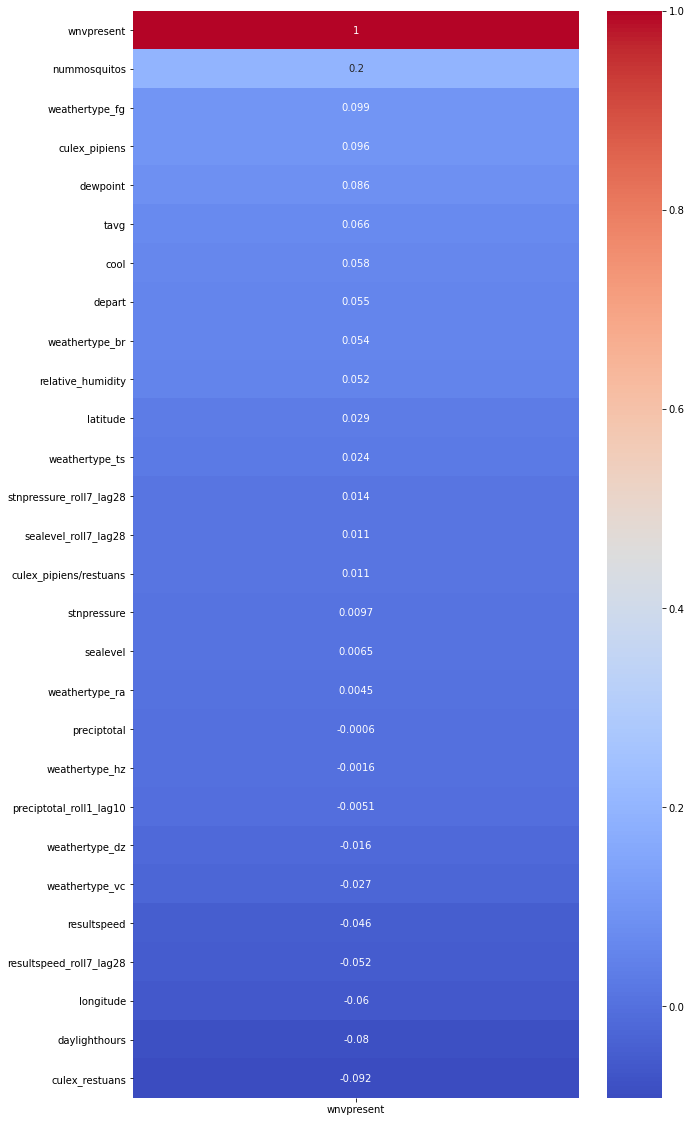

In [102]:
# Evaluating new features
plt.figure(figsize = (10,20));
sns.heatmap(df.corr()[['wnvpresent']].sort_values('wnvpresent',ascending=False), cmap = 'coolwarm', annot = True);

In [103]:
#drop the rolled/lagged features temporarily
df.drop(columns = ['preciptotal_roll1_lag10','stnpressure_roll7_lag28', 'sealevel_roll7_lag28', 'resultspeed_roll7_lag28'], inplace = True)

In [104]:
#Create rolls and lags using the entire weather dataframe
create_roll_lag(new_weather, features = ['preciptotal'], rolls = [1], lags = [10])
create_roll_lag(new_weather, features = ['stnpressure','sealevel','resultspeed'], rolls = [7], lags = [28])

,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,weathertype_vc,weathertype_dz,weathertype_ra,weathertype_hz,weathertype_sn,weathertype_br,weathertype_fg,weathertype_fu,weathertype_sq,weathertype_gr,weathertype_ts,weathertype_bc,weathertype_fg+,weathertype_mi,preciptotal_roll1_lag10,stnpressure_roll7_lag28,sealevel_roll7_lag28,resultspeed_roll7_lag28
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-05-01,67.0,14.0,51.0,56.5,0.0,2.5,448.0,1849.0,0.0000,29.140,29.820,2.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2007-05-02,51.0,-3.0,42.0,47.0,13.5,0.0,447.0,1850.0,0.0000,29.410,30.085,13.15,0,0,0,1,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2007-05-03,57.0,2.0,40.0,49.0,8.0,0.0,446.0,1851.0,0.0000,29.425,30.120,12.30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2007-05-04,61.0,4.0,41.5,50.0,7.0,0.0,444.0,1852.0,0.0025,29.335,30.045,10.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2007-05-05,60.0,5.0,38.5,49.5,5.0,0.0,443.0,1853.0,0.0050,29.430,30.095,11.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-27,65.0,16.0,51.5,58.5,0.5,1.0,618.0,1653.0,0.0100,28.960,29.665,12.35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0075,29.502143,30.195714,3.285714
2014-10-28,56.5,10.0,39.0,47.5,8.0,0.0,619.0,1651.0,0.0175,29.190,29.850,14.40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0150,29.462143,30.156429,4.192857
2014-10-29,43.0,-4.0,33.0,41.0,21.0,0.0,620.0,1650.0,0.0000,29.390,30.065,9.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,29.412143,30.107143,4.900000


In [105]:
rolls_lags = new_weather[['preciptotal_roll1_lag10','stnpressure_roll7_lag28','sealevel_roll7_lag28', 'resultspeed_roll7_lag28']]

In [106]:
#combine rolled/lagged features to model dataframe
df = pd.merge(df, rolls_lags, left_index = True, right_index = True)

In [107]:
df.isnull().sum()

date                        0
trap                        0
latitude                    0
longitude                   0
nummosquitos                0
wnvpresent                  0
culex_pipiens               0
culex_pipiens/restuans      0
culex_restuans              0
tavg                        0
depart                      0
dewpoint                    0
cool                        0
preciptotal                 0
stnpressure                 0
sealevel                    0
resultspeed                 0
weathertype_vc              0
weathertype_dz              0
weathertype_ra              0
weathertype_hz              0
weathertype_br              0
weathertype_fg              0
weathertype_ts              0
daylighthours               0
relative_humidity           0
preciptotal_roll1_lag10     0
stnpressure_roll7_lag28    25
sealevel_roll7_lag28       25
resultspeed_roll7_lag28    25
dtype: int64

In [108]:
#drop original features
df.drop(columns = ['preciptotal','stnpressure','sealevel','resultspeed'],inplace = True)

In [109]:
#impute null values with the nearest date
nearest_val = new_weather[new_weather.index == '2007-06-04 00:00:00']
df['stnpressure_roll7_lag28'].fillna(nearest_val['stnpressure_roll7_lag28'].values[0], inplace = True)
df['sealevel_roll7_lag28'].fillna(nearest_val['sealevel_roll7_lag28'].values[0], inplace = True)
df['resultspeed_roll7_lag28'].fillna(nearest_val['resultspeed_roll7_lag28'].values[0],inplace = True)

In [110]:
df.isnull().sum()

date                       0
trap                       0
latitude                   0
longitude                  0
nummosquitos               0
wnvpresent                 0
culex_pipiens              0
culex_pipiens/restuans     0
culex_restuans             0
tavg                       0
depart                     0
dewpoint                   0
cool                       0
weathertype_vc             0
weathertype_dz             0
weathertype_ra             0
weathertype_hz             0
weathertype_br             0
weathertype_fg             0
weathertype_ts             0
daylighthours              0
relative_humidity          0
preciptotal_roll1_lag10    0
stnpressure_roll7_lag28    0
sealevel_roll7_lag28       0
resultspeed_roll7_lag28    0
dtype: int64

<a id='test'></a>
## Test Data

The same data cleaning and feature engineering process will need to be applied to the test data.

In [111]:
test.head()

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
date,,,,,,,,,,,
2008-06-11,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2008-06-11,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2008-06-11,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2008-06-11,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2008-06-11,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [112]:
test.shape

(116293, 11)

#### Mosquito Species Encoding

In [113]:
test['species'].value_counts(normalize = True)

CULEX PIPIENS/RESTUANS    0.132072
CULEX RESTUANS            0.126147
CULEX PIPIENS             0.124866
CULEX SALINARIUS          0.123438
CULEX TERRITANS           0.123404
CULEX TARSALIS            0.123369
CULEX ERRATICUS           0.123352
UNSPECIFIED CULEX         0.123352
Name: species, dtype: float64

In [114]:
#Encode mosquito species into binary features
test['culex_pipiens'] = test['species'].map(lambda x: 1 if x == 'CULEX PIPIENS' else 0)
test['culex_pipiens/restuans'] = test['species'].map(lambda x: 1 if x == 'CULEX PIPIENS/RESTUANS' else 0)
test['culex_restuans'] = test['species'].map(lambda x: 1 if x == 'CULEX RESTUANS' else 0)

# drop column species
test.drop('species',axis=1, inplace=True)

#### Merge Test with Weather Data

In [115]:
#Merge test dataframe with weather on date
test_df = pd.merge(test, new_weather, left_index=True, right_index=True)

In [116]:
test_df.head()

,id,date,address,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,culex_pipiens,culex_pipiens/restuans,culex_restuans,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,preciptotal,stnpressure,sealevel,resultspeed,weathertype_vc,weathertype_dz,weathertype_ra,weathertype_hz,weathertype_sn,weathertype_br,weathertype_fg,weathertype_fu,weathertype_sq,weathertype_gr,weathertype_ts,weathertype_bc,weathertype_fg+,weathertype_mi,preciptotal_roll1_lag10,stnpressure_roll7_lag28,sealevel_roll7_lag28,resultspeed_roll7_lag28
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-06-11,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,1,0,75.0,7.0,55.5,64.0,0.0,10.0,416.0,1926.0,0.0,29.31,29.98,9.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.145714,29.834286,8.835714
2008-06-11,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,1,75.0,7.0,55.5,64.0,0.0,10.0,416.0,1926.0,0.0,29.31,29.98,9.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.145714,29.834286,8.835714
2008-06-11,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,75.0,7.0,55.5,64.0,0.0,10.0,416.0,1926.0,0.0,29.31,29.98,9.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.145714,29.834286,8.835714
2008-06-11,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,75.0,7.0,55.5,64.0,0.0,10.0,416.0,1926.0,0.0,29.31,29.98,9.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.145714,29.834286,8.835714
2008-06-11,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,0,0,0,75.0,7.0,55.5,64.0,0.0,10.0,416.0,1926.0,0.0,29.31,29.98,9.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,29.145714,29.834286,8.835714


### Feature Engineering
#### Daylight Hours

In [117]:
#Change time of sunset 1760 to 1800
test_df['sunset'].replace(1760,1800, inplace=True)

In [118]:
new_sunset = []
for x in test_df['sunset']:
    new_sunset.append(dt.datetime.combine(dt.date(1, 1, 1),float_to_time(x)))
test_df['sunset'] = new_sunset

In [119]:
new_sunrise = []
for x in test_df['sunrise']:
    new_sunrise.append(dt.datetime.combine(dt.date(1, 1, 1),float_to_time(x)))
test_df['sunrise'] = new_sunrise

In [120]:
test_df['daylighthours'] = test_df['sunset'] - test_df['sunrise']

In [121]:
#Convert daylight hours to float
hours = []
for x in test_df['daylighthours']:
    hours.append(round(x.total_seconds()/3600,2))
test_df['daylighthours'] = hours

#### Relative Humidity

In [122]:
# Convert temperature to units of Celcius
T = (test_df['tavg'] - 32) * (5/9)
TD = (test_df['dewpoint'] - 32) * (5/9)

#Calculate vapour pressures
vap_act = 6.11 * (10 ** ((7.5*TD)/(237.3 + TD)))
vap_sat =  6.11 * (10 ** ((7.5*T)/(237.3 + T)))

#Relative humidity
RH = 100* vap_act/vap_sat

In [123]:
test_df['relative_humidity'] = RH

#### Check columns for train and test

In [124]:
#Drop columns not used
test_df.drop(columns = ['address','block','street','addressnumberandstreet','addressaccuracy',
                        'weathertype_fg+','weathertype_mi','weathertype_gr','weathertype_sn',
                        'weathertype_bc','weathertype_fu','weathertype_sq','heat','wetbulb',
                        'sunrise','sunset','preciptotal','stnpressure','sealevel','resultspeed'], inplace = True)

In [125]:
test_df.columns

Index(['id', 'date', 'trap', 'latitude', 'longitude', 'culex_pipiens',
       'culex_pipiens/restuans', 'culex_restuans', 'tavg', 'depart',
       'dewpoint', 'cool', 'weathertype_vc', 'weathertype_dz',
       'weathertype_ra', 'weathertype_hz', 'weathertype_br', 'weathertype_fg',
       'weathertype_ts', 'preciptotal_roll1_lag10', 'stnpressure_roll7_lag28',
       'sealevel_roll7_lag28', 'resultspeed_roll7_lag28', 'daylighthours',
       'relative_humidity'],
      dtype='object')

In [126]:
df.columns

Index(['date', 'trap', 'latitude', 'longitude', 'nummosquitos', 'wnvpresent',
       'culex_pipiens', 'culex_pipiens/restuans', 'culex_restuans', 'tavg',
       'depart', 'dewpoint', 'cool', 'weathertype_vc', 'weathertype_dz',
       'weathertype_ra', 'weathertype_hz', 'weathertype_br', 'weathertype_fg',
       'weathertype_ts', 'daylighthours', 'relative_humidity',
       'preciptotal_roll1_lag10', 'stnpressure_roll7_lag28',
       'sealevel_roll7_lag28', 'resultspeed_roll7_lag28'],
      dtype='object')

In [127]:
test_df.isnull().sum()

id                         0
date                       0
trap                       0
latitude                   0
longitude                  0
culex_pipiens              0
culex_pipiens/restuans     0
culex_restuans             0
tavg                       0
depart                     0
dewpoint                   0
cool                       0
weathertype_vc             0
weathertype_dz             0
weathertype_ra             0
weathertype_hz             0
weathertype_br             0
weathertype_fg             0
weathertype_ts             0
preciptotal_roll1_lag10    0
stnpressure_roll7_lag28    0
sealevel_roll7_lag28       0
resultspeed_roll7_lag28    0
daylighthours              0
relative_humidity          0
dtype: int64

### Export features as csv

In [128]:
#Convert to csv
#Note: Unhashtag the below lines to export the csvs.

df.to_csv('../../datasets/train_df.csv', index = False)
test_df.to_csv('../../datasets/test_df.csv', index = False)